# Result Anaysis

## Import 

In [87]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [2]:
df = pd.read_csv(
    '../../not_on_git/final_classification/all_classified.csv' , 
    usecols=['name'  , 'ra' ,'dec' ,'prob', 'class' , 'prob_margin' ] , 
    index_col='name')
df 

,ra,dec,class,prob,prob_margin
name,,,,,
2CXO J003935.9-732725,9.899767,-73.457136,STAR,0.777433,0.638933
2CXO J003936.7-731249,9.903193,-73.213742,PULSAR,0.608646,0.451597
2CXO J004028.7-731106,10.119748,-73.185171,AGN,0.446212,0.092019
2CXO J004506.3-730056,11.276413,-73.015666,PULSAR,0.598368,0.283901
2CXO J004659.0-731918,11.745895,-73.321890,STAR,0.821817,0.718309
...,...,...,...,...,...
2CXO J220433.1-495916,331.138121,-49.987838,HMXB,0.671695,0.438401
2CXO J220508.3-495935,331.284642,-49.993301,HMXB,0.913425,0.850303
2CXO J220544.0-495505,331.433541,-49.918280,HMXB,0.801407,0.710030


## Result data analysis

In [3]:
from utilities import deets

In [16]:
labels = ['AGN' , 'STAR' , 'YSO' , 'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']

#### Probability distribution

##### Using histogram

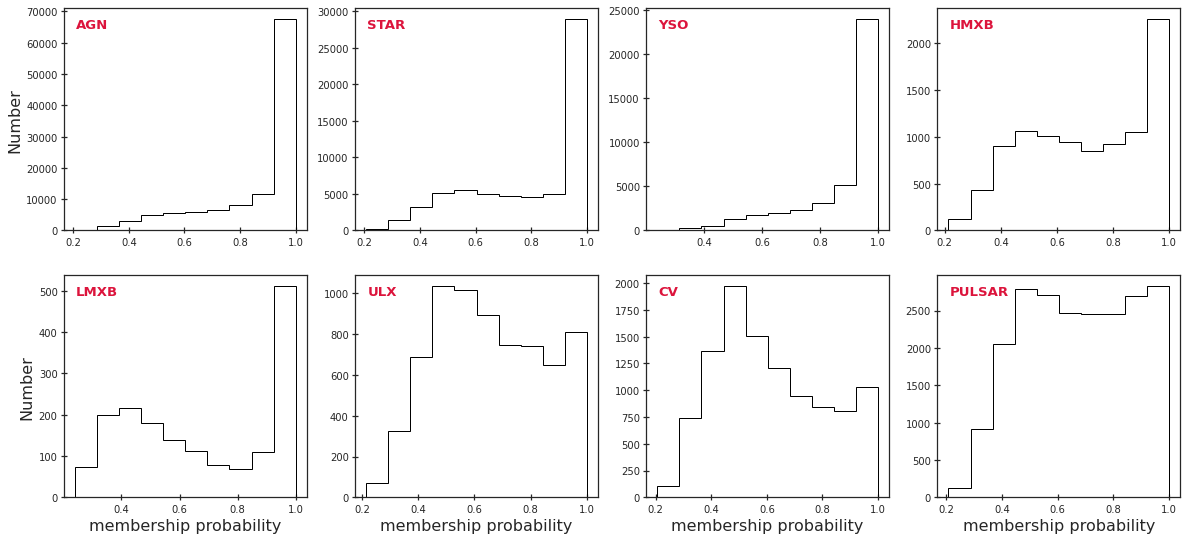

In [105]:
from utilities import set_plot
set_plot(font_size=1.1)
fig,ax = plt.subplots(nrows=2 , ncols=4 , figsize=(20,9))
for c , a in zip(labels, ax.ravel()):
    a.hist(df[df['class']==c]['prob'] , density=False , label = c , histtype ='step' , color='black'  , ec = 'black', linewidth = 1)
    a.text(0.05,0.91 , c , transform=a.transAxes , color='crimson' , fontweight='bold')
    a.tick_params(which='both' , direction='inout' , labelsize=10)
    #a.legend(loc='upper left')
for a in ax.ravel()[4:]:
    a.set_xlabel('membership probability' , fontsize=16)
ax[0][0].set_ylabel('Number' , fontsize=16)
ax[1][0].set_ylabel('Number' , fontsize=16)
plt.savefig('result/plots/probability_plots.eps')
plt.show()


##### Using KDE

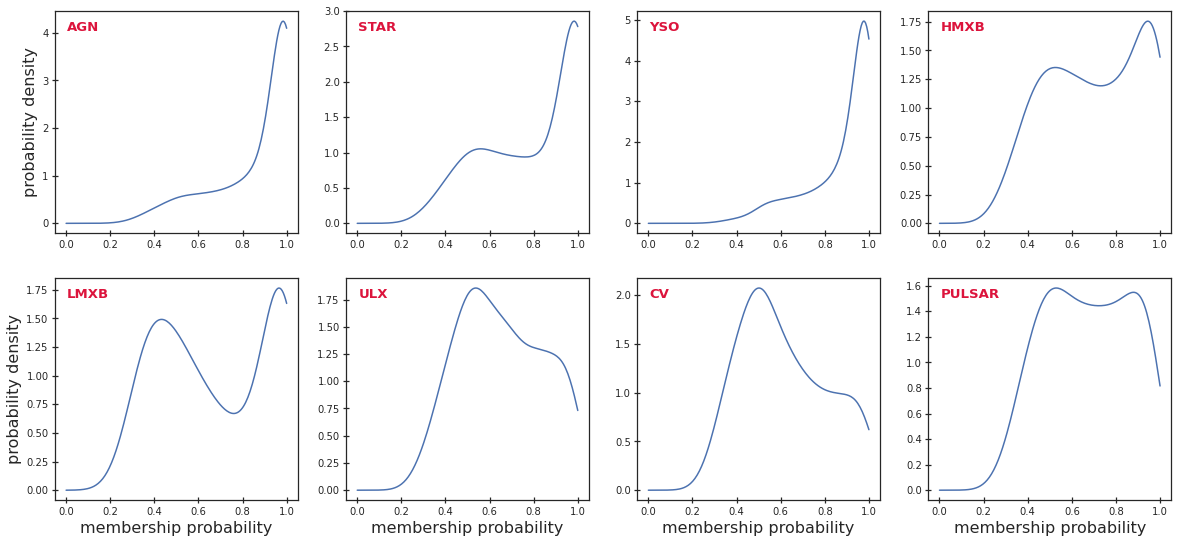

In [104]:
from utilities import set_plot
set_plot(font_size=1.1)
fig,ax = plt.subplots(nrows=2 , ncols=4 , figsize=(20,9))
for c , a in zip(labels, ax.ravel()):
    kde = gaussian_kde(df[df['class']==c]['prob'] , bw_method = 0.3)
    prob_x =  np.linspace(0,1 , num=200)
    pdf = kde.evaluate(prob_x)
    a.plot(prob_x , pdf)
    #a.hist(df[df['class']==c]['prob'] , density=True , label = c , histtype ='step' , color='black'  , ec = 'black', linewidth = 1)
    a.text(0.05,0.91 , c , transform=a.transAxes , color='crimson' , fontweight='bold')
    a.tick_params(which='both' , direction='inout' , labelsize=10)
    #a.legend(loc='upper left')
for a in ax.ravel()[4:]:
    a.set_xlabel('membership probability' , fontsize=16)
ax[0][0].set_ylabel('probability density' , fontsize=16)
ax[1][0].set_ylabel('probability density' , fontsize=16)
plt.savefig('result/plots/probability_plots_density.eps')
plt.show()


#### KDE for finding max-probable CMP

In [84]:
from scipy.stats import gaussian_kde

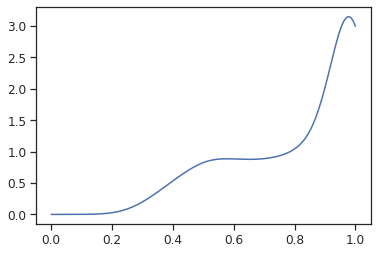

In [99]:
kde = gaussian_kde(df['prob'] , bw_method = 0.3)
prob_x =  np.linspace(0,1 , num=200)
pdf = kde.evaluate(prob_x)
plt.plot(prob_x , pdf)
plt.show()